# Object Detection with OpenAI's CLIP

**NOTE: THIS IS TECHNICALLY IMAGE CLASSIFICATION, TRUE OBJECT DETECTION USES TECHNIQUES LIKE YOLO, HOWEVER AUTOGLUON IS STILL PRONE TO CRASHING IF YOU DON'T HAVE ENOUGH COMPUTE FOR YOLO BASED OBJECT DETECTION. WE RECOMMEND USING AWS SAGEMAKER IF YOU NEED OBJECT DETECTION AT SCALE.**

OpenAI created a model named [CLIP](https://openai.com/blog/clip/),which is the basis of their DALLE MODEL. And its accuracy is high, e.g., CLIP can achieve 76.2% top-1 accuracy on ImageNet without using any of the 1.28M training samples. 
## Simple Demo

Here we provide a simple demo to classify what animal is in a picture.

In [ ]:
!pip install autogluon

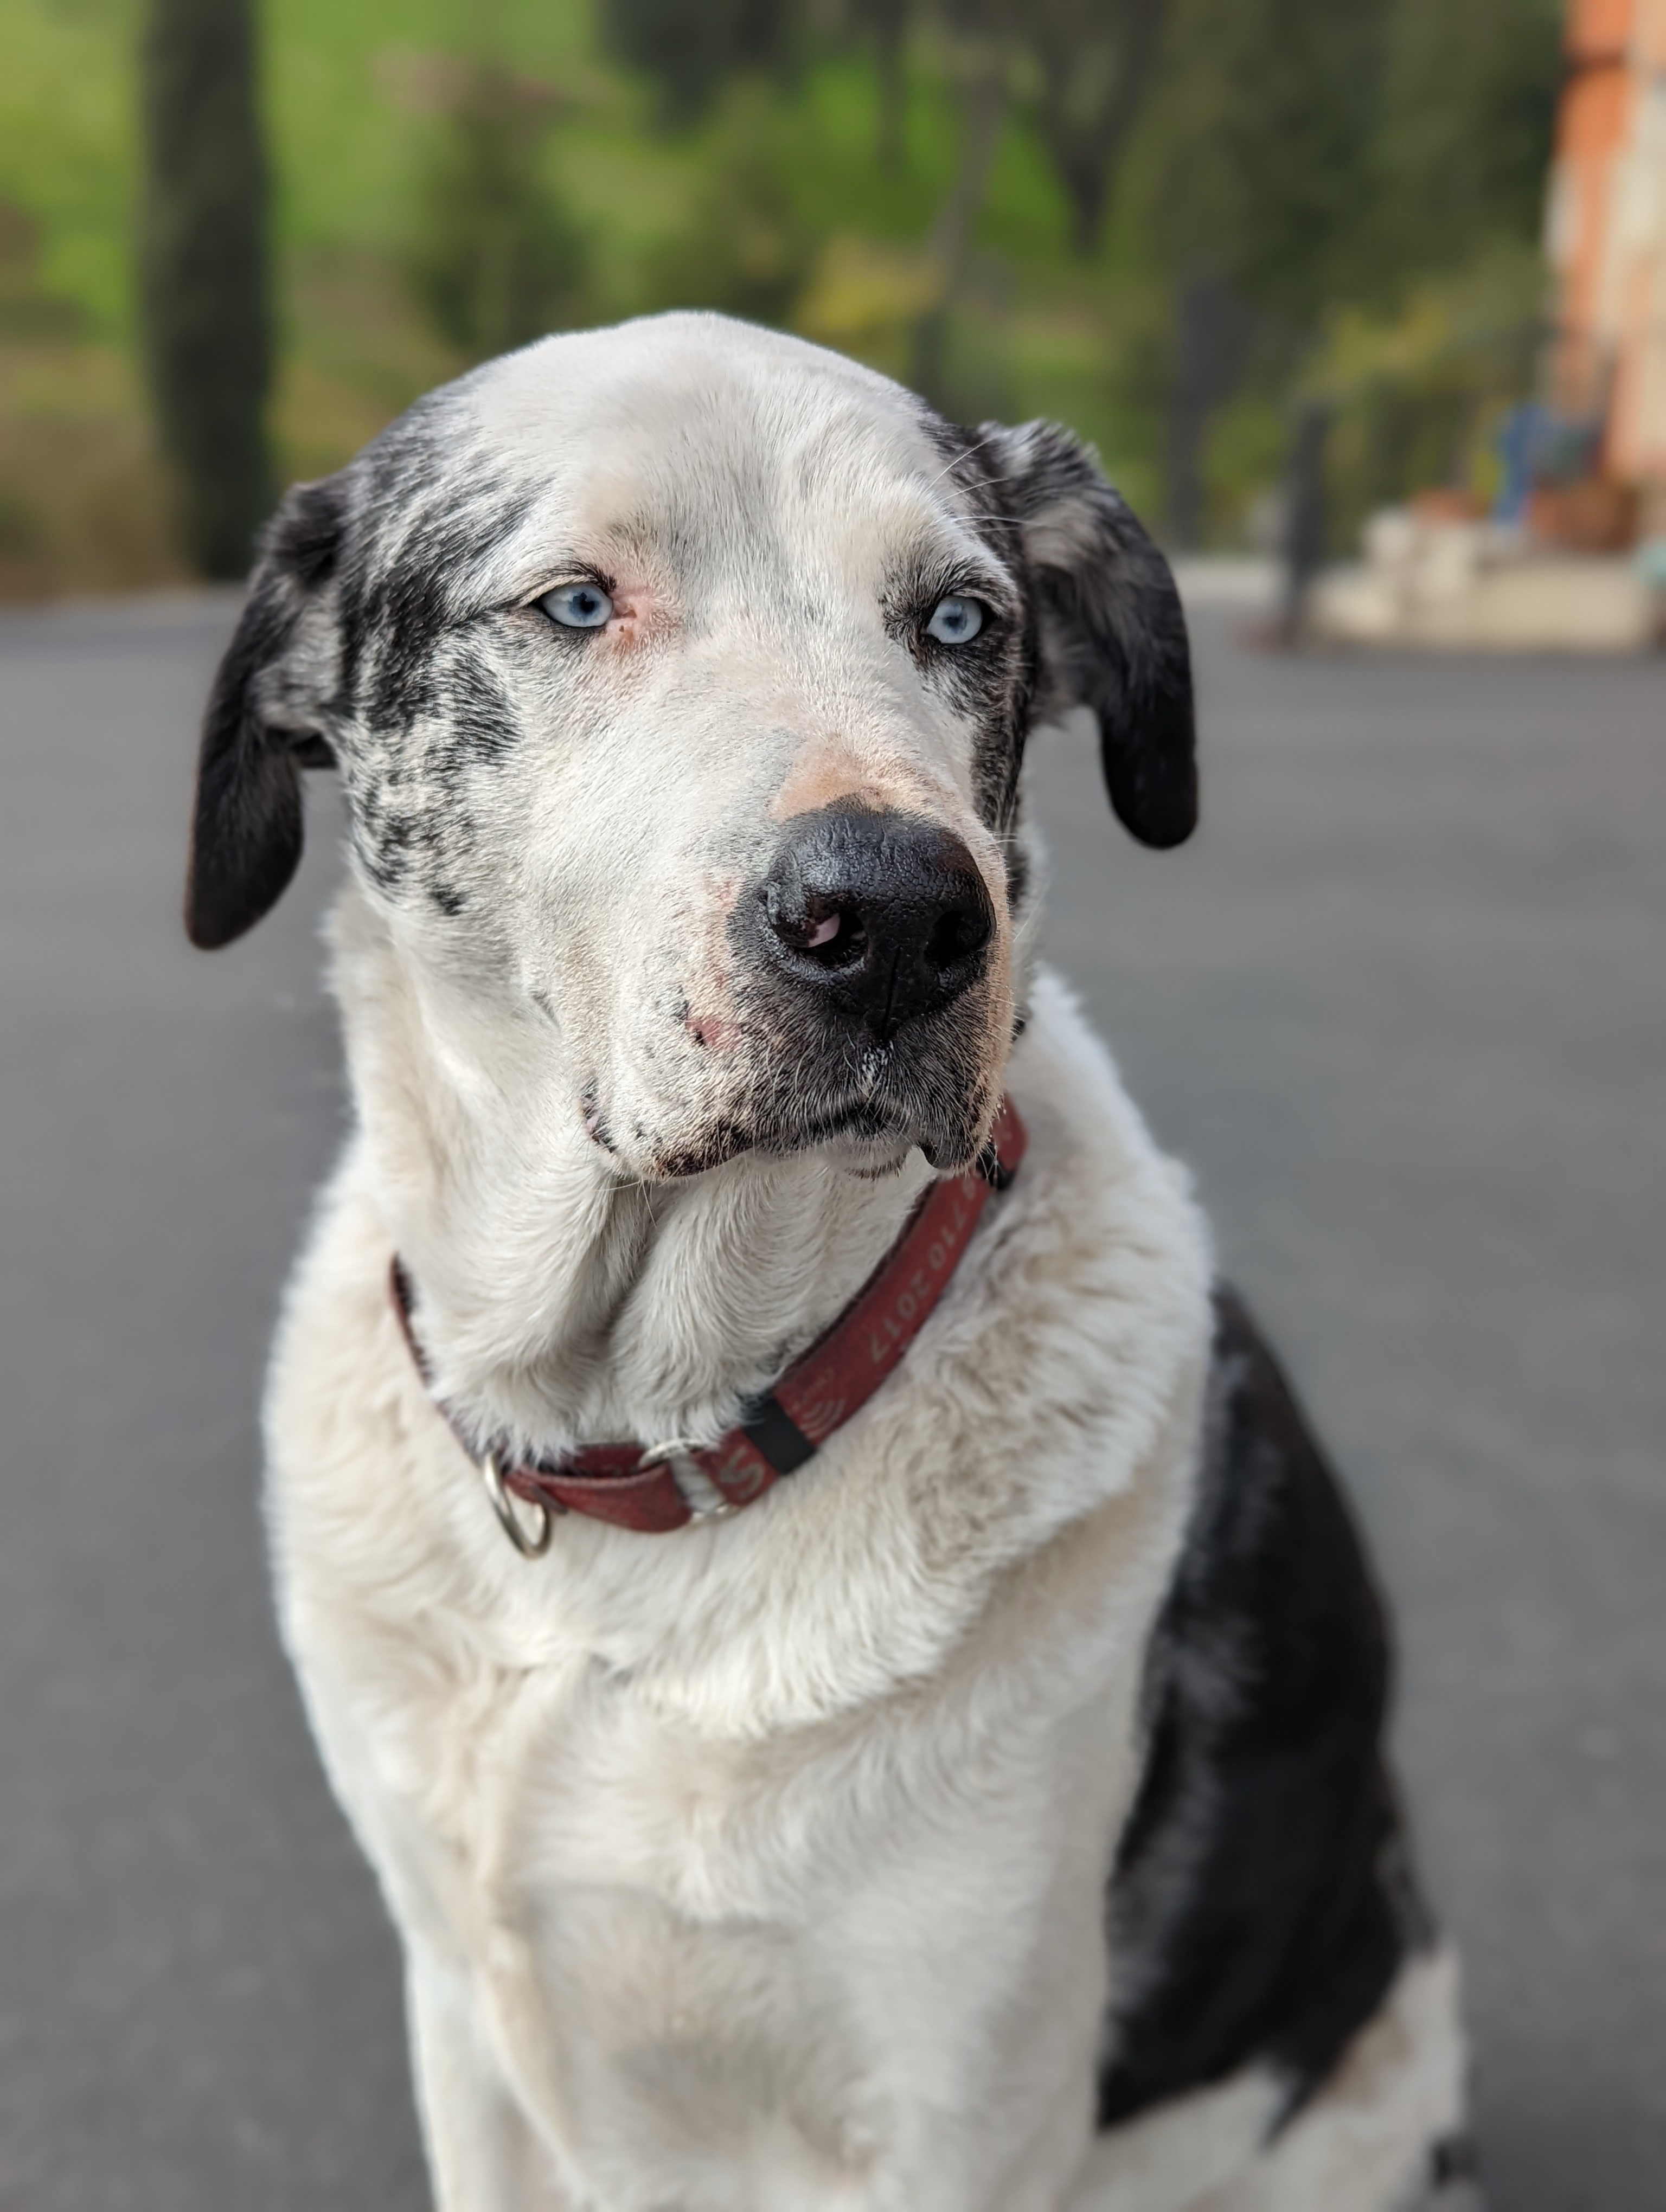

In [1]:
from IPython.display import Image, display
from autogluon.multimodal import download

pil_img = Image(filename="frankie_dog.jpg")
display(pil_img)

Normally to know what is in this picture, you would need YOLO or your own custom trained image classifier from labeled image data, but with CLIP, all you need to do is provide some potential visual categories. CLIP will handle the rest for you.

In [3]:
from autogluon.multimodal import MultiModalPredictor
dog_image = '/content/frankie_dog.jpg'
predictor = MultiModalPredictor(problem_type="zero_shot_image_classification")
prob = predictor.predict_proba({"image": [dog_image]}, {"text": ['This is a dog', 'This is a human', 'This is a Car.']})
print("Label probs:", prob)

The model does not support using an image size that is different from the default size. Provided image size=224. Default size=336. Detailed model configuration=CLIPConfig {
  "_commit_hash": "ce19dc912ca5cd21c8a653c79e251e808ccabcd1",
  "_name_or_path": "openai/clip-vit-large-patch14-336",
  "architectures": [
    "CLIPModel"
  ],
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "clip",
  "projection_dim": 768,
  "text_config": {
    "_name_or_path": "",
    "add_cross_attention": false,
    "architectures": null,
    "attention_dropout": 0.0,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 0,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": null,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "dropout": 0.0,
    "early_stopping": false,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 2,
    "exponential_decay_length_penalty": null,
    "finetu

Label probs: [[8.0226594e-01 1.9698696e-01 7.4713567e-04]]
